# Magnus

In [1]:
# librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

Parámetros físicos

In [2]:
m = 0.450   # masa (kg)
r = 0.115   # radio (m)
A = np.pi * r**2    # area transversal (m^2)
rho = 1.3   # densidad del aire (kg/m^3)
g = 9.81    # gravedad (m/s^2)
CD = 0.5    # coeficiente de arrastre
CM = 0.2    # coeficiente de Magnus

Velocidad inicial y rotación

In [3]:
v0 = np.array([0, 30, 40])   # velocidad inicial (m/s) en [x, y, z]
omega = np.array([0, 0, -600])   # velocidad angular (rad/s) en [x, y, z]

Tiempos

In [4]:
# segundos
dt = 0.001
t_max = 10 
t = np.arange(0, t_max + dt, dt)  # array
n_steps = len(t)

Condiciones iniciales

In [5]:
pos = np.zeros((3, n_steps))   # posicion (x, y, z)
vel = np.zeros((3, n_steps))   # velocidad (x, y, z)

pos[:, 0] = np.array([0, 0, 0])  # posicion inicial (m)
vel[:, 0] = v0                  # velocidad inicial (m/s)


Fuerza de Magnus

In [6]:
def magnus_force(v, omega):
    v_norm = np.linalg.norm(v)
    cross_v_omega = np.cross(v, omega)
    cross_norm = np.linalg.norm(cross_v_omega)
    if cross_norm == 0:
        return np.zeros(3)
    return CM * rho * A * v_norm**2 * (cross_v_omega / cross_norm)


Método de Euler

In [7]:
for i in range(n_steps - 1):
    v = vel[:, i]
    r_pos = pos[:, i]
    
    # F gravitatoria
    Fg = np.array([0, 0, -m * g])
    
    # F de arrastre (resistencia del aire)
    Fr = -0.5 * rho * CD * A * np.linalg.norm(v) * v
    
    # F de Magnus
    FM = magnus_force(v, omega)
    
    # aceleracion total
    accel = (Fg + Fr + FM) / m
    
    # actualizacion de velocidad y posición con Euler
    vel[:, i + 1] = v + accel * dt
    pos[:, i + 1] = r_pos + v * dt
    
    # detener si la esfera toca el suelo
    if pos[2, i + 1] < 0:
        pos = pos[:, :i + 2]
        vel = vel[:, :i + 2]
        t = t[:i + 2]
        break

Gráficas

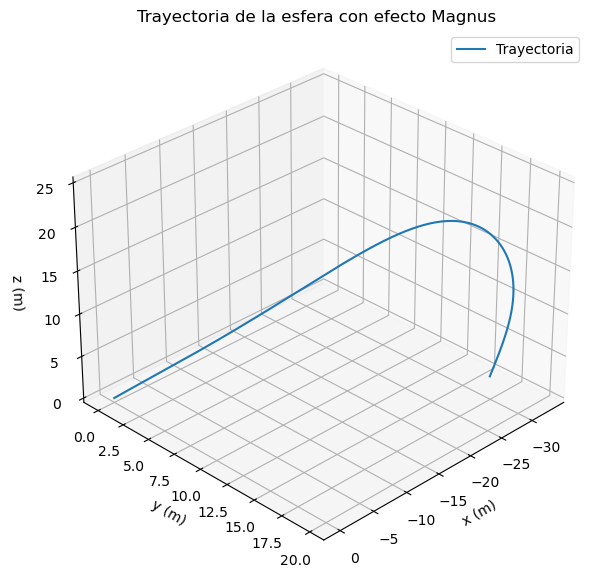

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[0, :], pos[1, :], pos[2, :], linewidth=1.5)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_title('Trayectoria de la esfera con efecto Magnus')
ax.legend(['Trayectoria'])
ax.view_init(30, 45)
plt.grid(True)
plt.show()

Gráficas 2D de posiciones en función del tiempo

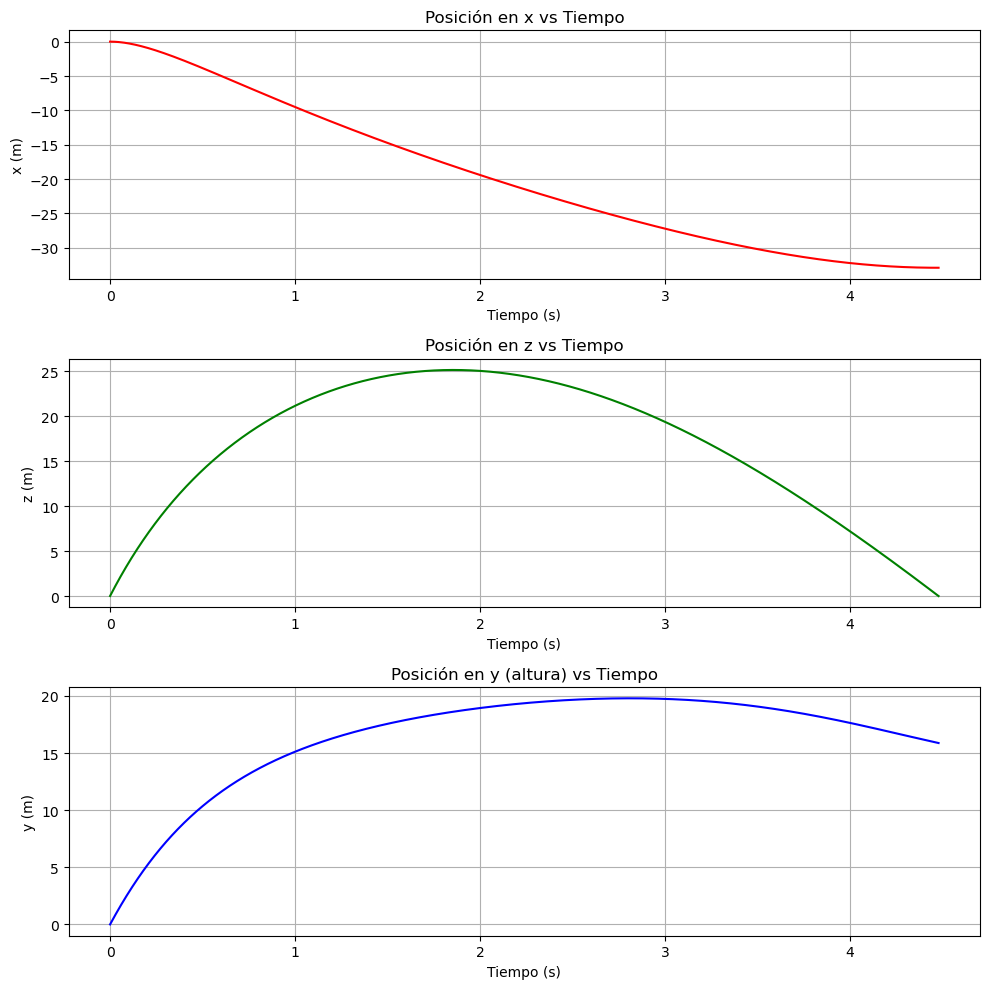

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# x vs tiempo
axs[0].plot(t, pos[0, :], 'r', linewidth=1.5)
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('x (m)')
axs[0].set_title('Posición en x vs Tiempo')
axs[0].grid(True)

# z vs tiempo
axs[1].plot(t, pos[2, :], 'g', linewidth=1.5)
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('z (m)')
axs[1].set_title('Posición en z vs Tiempo')
axs[1].grid(True)

# y vs tiempo
axs[2].plot(t, pos[1, :], 'b', linewidth=1.5)
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('y (m)')
axs[2].set_title('Posición en y (altura) vs Tiempo')
axs[2].grid(True)

plt.tight_layout()
plt.show()